In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

In [2]:
fashion_mnist = tf.keras.datasets.mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [4]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [5]:
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_valid.shape

(5000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train

array([5, 0, 4, ..., 0, 4, 0], dtype=uint8)

In [11]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

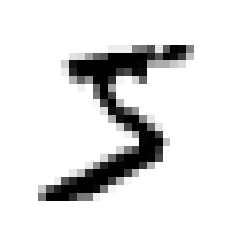

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
y_train[0]

5

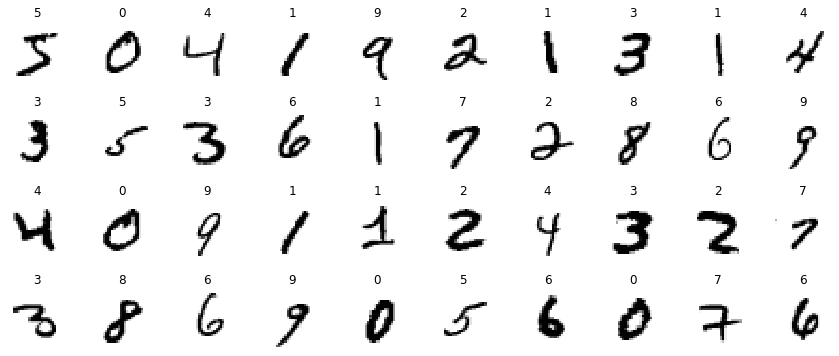

In [16]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [18]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


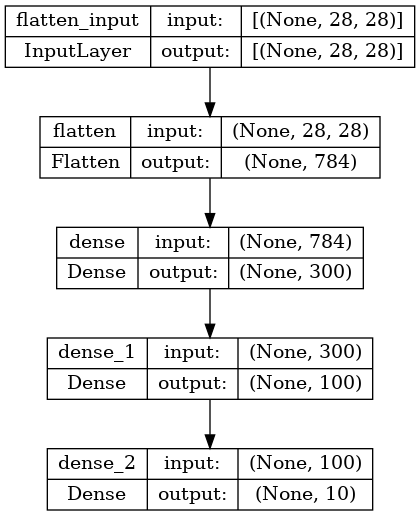

In [20]:
img_file = 'model_2_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer,
              metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)

In [23]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.5749 - val_loss: nan - val_accuracy: 0.0978
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0978
Epoch 8/10
1719/1719 [============

In [24]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [25]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

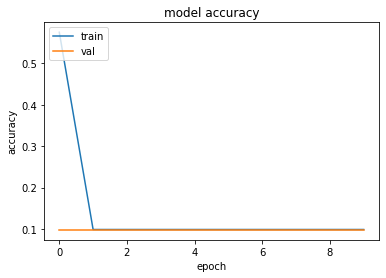

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Text(0, 0.5, 'Loss')

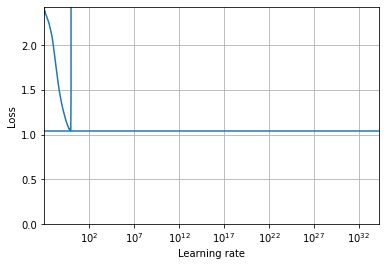

In [27]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0980


[nan, 0.09799999743700027]

In [32]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss:", results[0]*100)
print("test acc:", results[1]*100)

79/79 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0980
test loss: nan
test acc: 9.799999743700027


##### Error learning rate ######
The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [33]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [35]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer,
              metrics=["accuracy"])

In [36]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [37]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [38]:
history = model.fit(X_train, y_train, 
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1712/1719 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.9265

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9267 - val_loss: 0.0950 - val_accuracy: 0.9696
Epoch 2/100
1715/1719 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9709

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 5s 3ms/step - loss: 0.0964 - accuracy: 0.9709 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 3/100
1714/1719 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9787

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


1719/1719 [==============================] - 5s 3ms/step - loss: 0.0688 - accuracy: 0.9787 - val_loss: 0.0703 - val_accuracy: 0.9820
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0776 - val_accuracy: 0.9770
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0715 - val_accuracy: 0.9830
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.1429 - val_accuracy: 0.9644
Epoch 7/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0903 - val_accuracy: 0.9806
Epoch 8/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0882 - val_accuracy: 0.9788
Epoch 9/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0900 - val_accuracy: 0.97

In [39]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9782


[0.0728992223739624, 0.9782000184059143]

In [40]:
results = model.evaluate(X_test, y_test)
print("test loss:", results[0]*100)
print("test acc:", results[1]*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9782
test loss: 7.28992223739624
test acc: 97.82000184059143
